# Spatial Analysis

Using examples from 
- http://pysal.org/notebooks/viz/splot/esda_morans_viz.html
- http://darribas.org/gds15/content/labs/lab_06.html

Add population density
Add furlough and co-location? Remove areas where low desnity
https://mgimond.github.io/Spatial/uncertainty-in-census-data.html

Just map a covid - but don't show areas with such low population density

Spatial correlation of COVID mortality?
Spatial correlation of Furlought (spatial?)
Spatial correlation of higher ethnicicities ?
Spatial correlation of COVID cases ?

In [41]:
import matplotlib.pyplot as plt
from libpysal.weights.contiguity import Queen
from libpysal import examples
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import splot

In [4]:
import sys
sys.path.insert(0, '../src/data')
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import bame_datastore

Found local clean copy of Local_Authority_Districts__December_2009__Boundaries
Found local clean copy of fbook_covid_cases
Found local clean copy of BAME_report_cases
Found local clean copy of BAME_report_deaths
Found local clean copy of bame_excess_deaths
Found local clean copy of ons_deaths
Found local clean copy of ethnicity_2011
Found local clean copy of furlough_data
Found local clean copy of key_workers
Found local clean copy of deprivation_data
Found local clean copy of population_est_data


In [137]:
dense_df = pd.read_csv("../data/processed/dense_df.csv", index_col=0).drop(columns = "geometry")
gdf1 = bame_datastore.lad_geog.gdf.set_index("lad09nm")
gdf = gdf1.join(dense_df)
gdf["bame"] = gdf.Other+gdf.Black_African_Caribbean+gdf.Asian

In [138]:
gdf.columns

Index(['objectid', 'lad09cd', 'lad09nmw', 'st_areashape', 'st_lengthshape',
       'geometry', 'covid_deaths_pop', 'White', 'Other',
       'Black_African_Caribbean', 'Asian', 'pop_density', 'bame'],
      dtype='object')

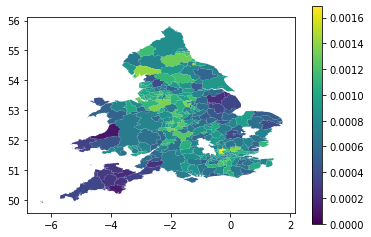

In [140]:
target_col = "covid_deaths_pop"
gdf = gdf.dropna(subset=[target_col])
gdf.plot(column=target_col, cmap='viridis', legend=True)

In [141]:
y = gdf[target_col].values
w = Queen.from_dataframe(gdf)
w.transform = 'r'

('WARNING: ', 100, ' is an island (no neighbors)')
('WARNING: ', 122, ' is an island (no neighbors)')
('WARNING: ', 123, ' is an island (no neighbors)')


/Users/yusufsohoye/pythoncode/covid_bame/venv/lib/python3.7/site-packages/libpysal/weights/weights.py:167: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
 There are 3 islands with ids: 100, 122, 123.
  warnings.warn(message)


In [142]:
# spatial Autocorrelation

from esda.moran import Moran

w = Queen.from_dataframe(gdf)
moran = Moran(y, w)
moran.I

('WARNING: ', 100, ' is an island (no neighbors)')
('WARNING: ', 122, ' is an island (no neighbors)')
('WARNING: ', 123, ' is an island (no neighbors)')


/Users/yusufsohoye/pythoncode/covid_bame/venv/lib/python3.7/site-packages/libpysal/weights/weights.py:167: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
 There are 3 islands with ids: 100, 122, 123.
  warnings.warn(message)


0.4834754639383201

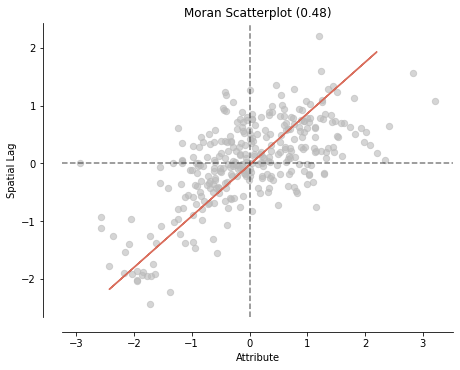

In [143]:
from splot.esda import moran_scatterplot
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()

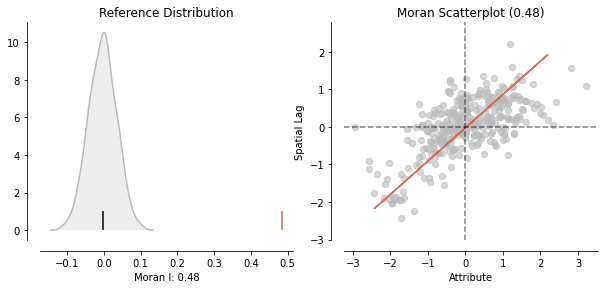

In [144]:
from splot.esda import plot_moran

plot_moran(moran, zstandard=True, figsize=(10,4))
plt.show()

In [145]:
moran.p_sim


0.001

/Users/yusufsohoye/pythoncode/covid_bame/venv/lib/python3.7/site-packages/esda/moran.py:886: RuntimeWarning: invalid value encountered in true_divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
/Users/yusufsohoye/pythoncode/covid_bame/venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/yusufsohoye/pythoncode/covid_bame/venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/yusufsohoye/pythoncode/covid_bame/venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1748: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


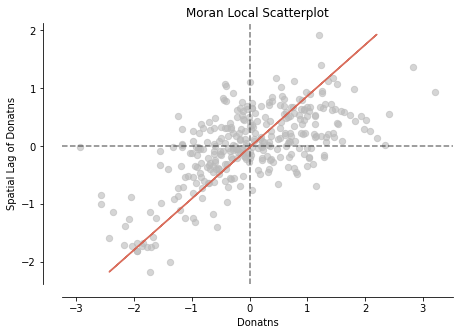

In [146]:
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local

# calculate Moran_Local and plot
moran_loc = Moran_Local(y, w)
fig, ax = moran_scatterplot(moran_loc)
ax.set_xlabel('Donatns')
ax.set_ylabel('Spatial Lag of Donatns')
plt.show()


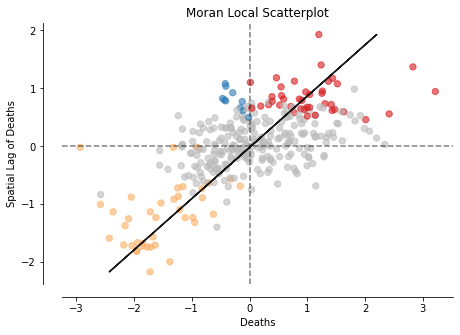

In [147]:
fig, ax = moran_scatterplot(moran_loc, p=0.05)
ax.set_xlabel('Deaths')
ax.set_ylabel('Spatial Lag of Deaths')
plt.show()

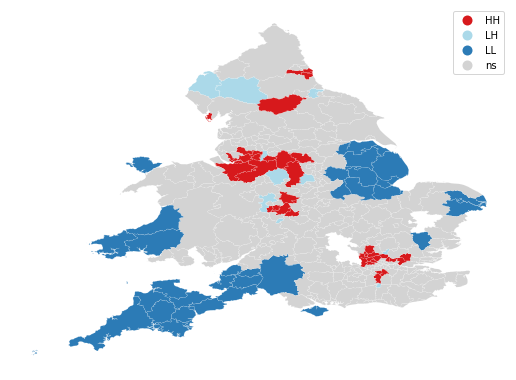

In [148]:
from splot.esda import lisa_cluster

lisa_cluster(moran_loc, gdf, p=0.05, figsize = (9,9))
plt.savefig(f"../reports/figures/spatial_cor_{target_col}.png")
plt.show()
